<a href="https://colab.research.google.com/github/mariyagolchin/Heatmap_Python/blob/main/Heatmap_and_Volcano_plot_in_Pythonin_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Heatmap and Volcano plot in Python**

https://www.reneshbedre.com/blog/heatmap-python.html

https://www.reneshbedre.com/blog/volcano.html


---





In [1]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
pip install bioinfokit

     |████████████████████████████████| 81kB 3.5MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.3-cp37-none-any.whl size=55622 sha256=0809088f4169eaa67a1e08163ba3490b6df274cca8d272c1c2d2cef03d16320f
  Stored in directory: /root/.cache/pip/wheels/94/f6/36/f2562d2c83714b882d83a97e56925b363c7b7a4a9eba9d64ad
  Created wheel for adjustText: filename=adjustText-0.7.3-cp37-none-any.whl size=7100 sha256=da185233405187b5ee2e1a6a2bc14a5f067918f9a6cb4e9bf19b9e4956f027e5
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built bioinfokit adjustText


In [29]:

# load dataset as pandas dataframe
# df = analys.get_data('/content/gdrive/MyDrive/hm_cot.csv')
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/hm_cot.csv')   # for CSV file
# df = pd.read_csv('your_data.csv', sep='\t')   # for tab-separated file
df.head(2)

,Gene,A,B,C,D,E,F
0,B-CHI,4.50570,3.26036,-1.24940,8.89807,8.05955,-0.842803
1,CTL2,3.50856,1.66079,-1.85668,-2.57336,-1.37370,1.196000


In [30]:
# set gene names as index
df = df.set_index(df.columns[0])
df.head(2)

,A,B,C,D,E,F
Gene,,,,,,
B-CHI,4.50570,3.26036,-1.24940,8.89807,8.05955,-0.842803
CTL2,3.50856,1.66079,-1.85668,-2.57336,-1.37370,1.196000


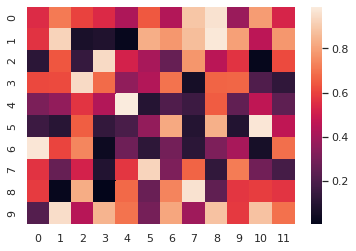

In [27]:
#test heatmap
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

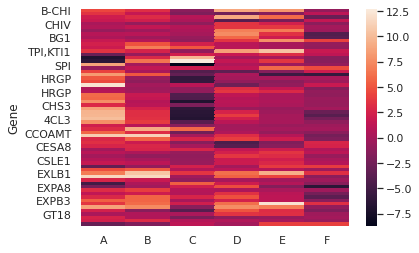

In [36]:
ax = sns.heatmap(df)



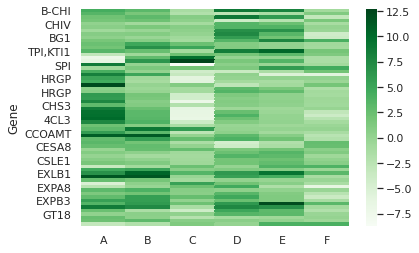

In [39]:
ax = sns.heatmap(df,cmap="Greens")
# # plot using a color palette
# sns.heatmap(df, cmap="YlGnBu")
# plt.show()

# sns.heatmap(df, cmap="Blues")
# plt.show()

# sns.heatmap(df, cmap="BuPu")
# plt.show()

# sns.heatmap(df, cmap="Greens")
# plt.show()

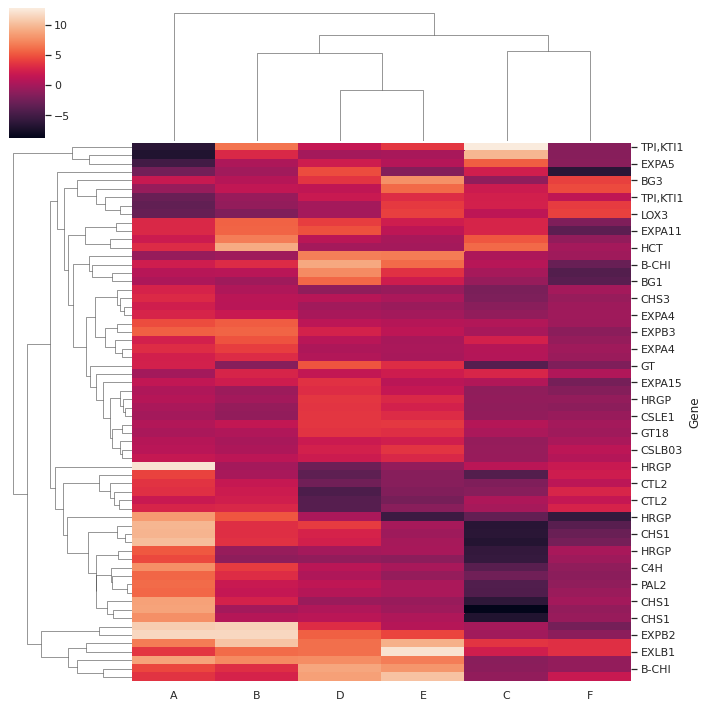

In [33]:
g = sns.clustermap(df)

In [41]:
# you can use interactive python interpreter, jupyter notebook, spyder or python code
# I am using interactive python interpreter (Python 3.7)
from bioinfokit import analys, visuz
# load dataset as pandas dataframe
df = analys.get_data('volcano').data
df.head(2)
#           GeneNames  value1  value2    log2FC       p-value
# 0  LOC_Os09g01000.1    8862   32767 -1.886539  1.250000e-55
#

,GeneNames,log2FC,p-value
0,LOC_Os09g01000.1,-1.886539,1.250000e-55
1,LOC_Os12g42876.1,3.231611,1.050000e-55


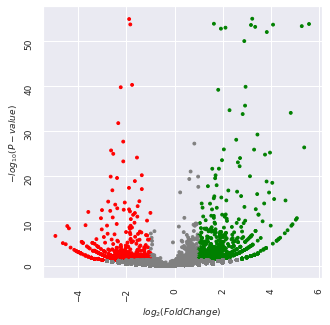

In [56]:
#  1  LOC_Os12g42876.1    1099     117  3.231611  1.050000e-55

# visuz.gene_exp.volcano(df=df, lfc='log2FC', pv='p-value')--------------
# plot will be saved in same directory (volcano.png)
# set parameter show=True, if you want view the image instead of saving
visuz.gene_exp.volcano(df=df, lfc='log2FC', pv='p-value',show=True)

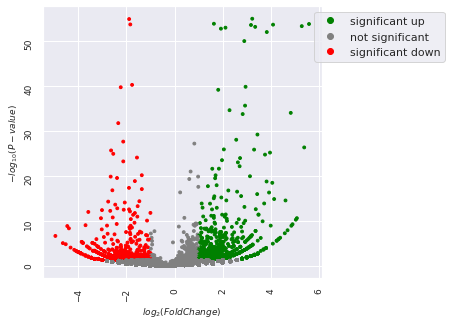

In [57]:
# Volcano plot in Python

# Add legend to the plot and adjust the legend position,

visuz.gene_exp.volcano(df=df, lfc='log2FC', pv='p-value', plotlegend=True, legendpos='upper right', legendanchor=(1.46,1),show=True)

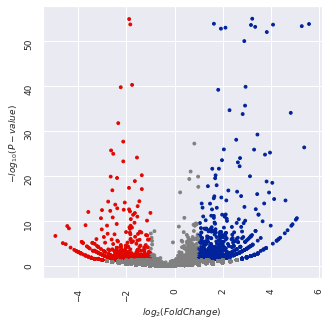

In [59]:
# change colormap
visuz.gene_exp.volcano(df=df, lfc='log2FC', pv='p-value', color=("#00239CFF", "grey", "#E10600FF"),show=True)

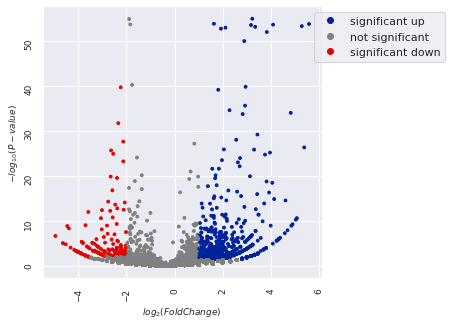

In [60]:
# Change log fold change and p value threshold,

visuz.gene_exp.volcano(df=df, lfc='log2FC', pv='p-value', lfc_thr=(1, 2), pv_thr=(0.05, 0.01), 
    color=("#00239CFF", "grey", "#E10600FF"), plotlegend=True, legendpos='upper right', legendanchor=(1.46,1),show=True)

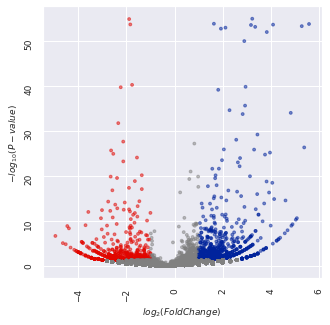

In [61]:
# Change transparency of volcano plot

visuz.gene_exp.volcano(df=df, lfc='log2FC', pv='p-value', color=("#00239CFF", "grey", "#E10600FF"), 
    valpha=0.5,show=True)

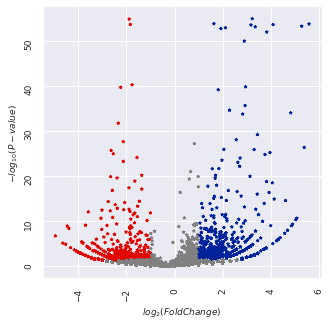

In [62]:
# Change the shape of the points

# add star shape
# check more shapes at https://matplotlib.org/3.1.1/api/markers_api.html
visuz.gene_exp.volcano(df=df, lfc='log2FC', pv='p-value', color=("#00239CFF", "grey", "#E10600FF"), 
    markerdot='*',show=True)

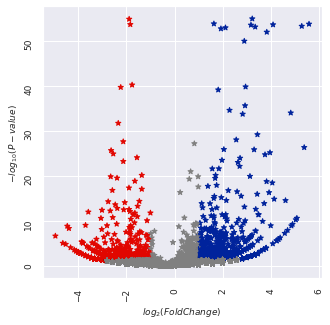

In [63]:
# Change the shape and size of the points

visuz.gene_exp.volcano(df=df, lfc='log2FC', pv='p-value', color=("#00239CFF", "grey", "#E10600FF"), 
    markerdot='*', dotsize=30,show=True)

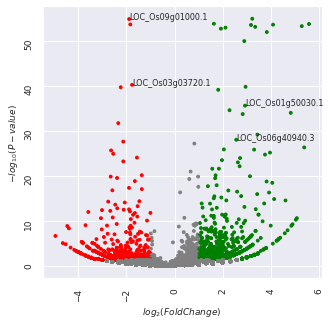

In [64]:
# Add gene labels (text style) to the points,

# add gene customized labels
# note: here you need to provide column name of gene Ids (geneid parameter)
# default simple text will be added
visuz.gene_exp.volcano(df=df, lfc="log2FC", pv="p-value", geneid="GeneNames",
    genenames=("LOC_Os09g01000.1", "LOC_Os01g50030.1", "LOC_Os06g40940.3", "LOC_Os03g03720.1"),show=True )
# if you want to label all DEGs defined lfc_thr and pv_thr, set genenames='deg'

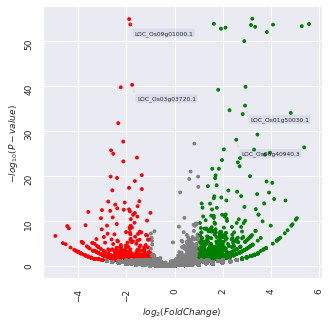

In [65]:
# Add gene labels (box style) to the points,

visuz.gene_exp.volcano(df=df, lfc="log2FC", pv="p-value", geneid="GeneNames",
    genenames=("LOC_Os09g01000.1", "LOC_Os01g50030.1", "LOC_Os06g40940.3", "LOC_Os03g03720.1"), gstyle=2 ,show=True)

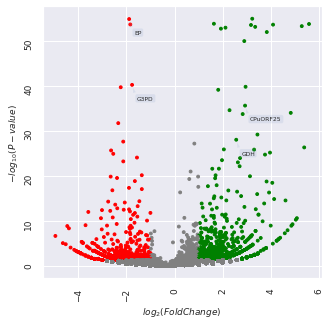

In [66]:
# Add gene names instead of gene Ids,

# add gene customized labels
# note: here you need to provide column name of gene Ids (geneid parameter)
# as the dataset only have geneids, you need to provide tuple of gene Id and corresponding gene names
visuz.gene_exp.volcano(df=df, lfc="log2FC", pv="p-value", geneid="GeneNames", 
    genenames=({"LOC_Os09g01000.1":"EP", "LOC_Os01g50030.1":"CPuORF25", "LOC_Os06g40940.3":"GDH", "LOC_Os03g03720.1":"G3PD"}),
    gstyle=2,show=True)

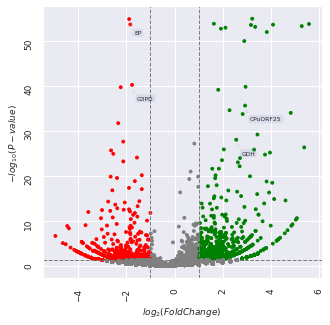

In [67]:
# Add threshold lines,

visuz.gene_exp.volcano(df=df, lfc="log2FC", pv="p-value", geneid="GeneNames", 
    genenames=({"LOC_Os09g01000.1":"EP", "LOC_Os01g50030.1":"CPuORF25", "LOC_Os06g40940.3":"GDH", "LOC_Os03g03720.1":"G3PD"}),
    gstyle=2, sign_line=True,show=True)

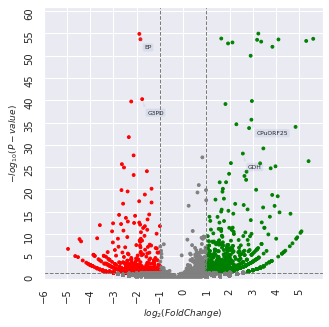

In [68]:
# Change X and Y range ticks, font size and name for tick labels

visuz.gene_exp.volcano(df=df, lfc="log2FC", pv="p-value", geneid="GeneNames", 
    genenames=({"LOC_Os09g01000.1":"EP", "LOC_Os01g50030.1":"CPuORF25", "LOC_Os06g40940.3":"GDH", "LOC_Os03g03720.1":"G3PD"}),
    gstyle=2, sign_line=True, xlm=(-6,6,1), ylm=(0,61,5), figtype='svg', axtickfontsize=10,
    axtickfontname='Verdana',show=True)